### Uncomment this when Running in Colab

In [ ]:
#!pip install --quiet phiflow==2.2.2
#import os
#if not os.path.isdir('eigenfluid-control'):
#  print("Cloning eigenfluid-control repo, this can take a moment")
#  os.system("git clone https://github.com/bobarna/eigenfluid-control")
#import sys; sys.path.append('eigenfluid-control')

## Imports & Initialization

In [1]:
from phi.torch.flow import *
import matplotlib.pyplot as plt

#from src.eigenfluid import Eigenfluid
from src.shapes import *

# Helper functions for visualization
from src.visu import *

import time

# Demo for Sampling Points on Shapes

<Figure size 360x360 with 2 Axes>

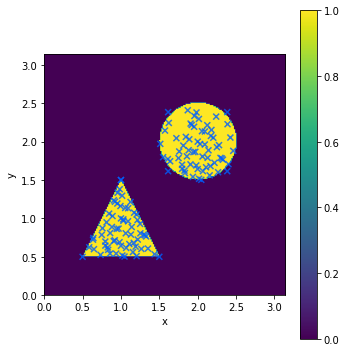

In [40]:
DOMAIN = Box(x=math.PI, y=math.PI)

c = Circle(pos=(1.5, 1.5), size=1)
s = Square(pos=(0.3, 2.0))
t = Triangle(pos=(0.5, 0.5))


O = 30
U = 30

p_0, p_t = get_points_for_shapes(c, t, O=O, U=U)
p_0 = math.concat([p_0, c.create_points(c.get_trivial_points())], instance('i'))
p_t = math.concat([p_t, t.create_points(t.get_trivial_points())], instance('i'))

p_s, _ = get_points_for_shapes(s,s, O, U)

vis.plot(vis.overlay(
    PointCloud(p_0, bounds=DOMAIN),
    PointCloud(p_t, bounds=DOMAIN),
    #PointCloud(p_s, bounds=DOMAIN),
    c.get_smoke(x=200, y=200) + t.get_smoke(x=200, y=200) #+ s.get_smoke(),
), size=(5,5), show_color_bar=True)

<Figure size 360x360 with 1 Axes>

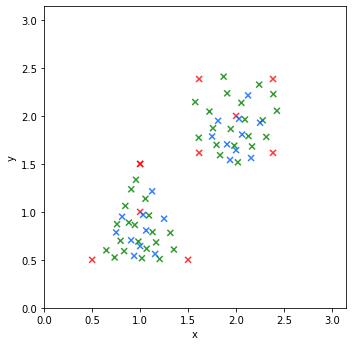

In [39]:
# sampling overlapping + unique points on both shapes

sampler_union = ShapeSampler(t, c, N=10, h1=2, h2=7)
sampler_t = ShapeSampler(t, N=20, h1=3, h2=11)
sampler_c = ShapeSampler(c, N=20, h1=3, h2=11)
plot(vis.overlay(
    PointCloud(t.create_points(t.get_trivial_points()), bounds=DOMAIN, color="red"),
    PointCloud(t.create_points(sampler_t.p), bounds=DOMAIN, color="green"),
    PointCloud(t.create_points(sampler_union.p), bounds=DOMAIN),
    PointCloud(c.create_points(c.get_trivial_points()), bounds=DOMAIN, color="red"),
    PointCloud(c.create_points(sampler_c.p), bounds=DOMAIN, color="green"),
    PointCloud(c.create_points(sampler_union.p), bounds=DOMAIN)
), size=(5,5))
